<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment08/DJLee_Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

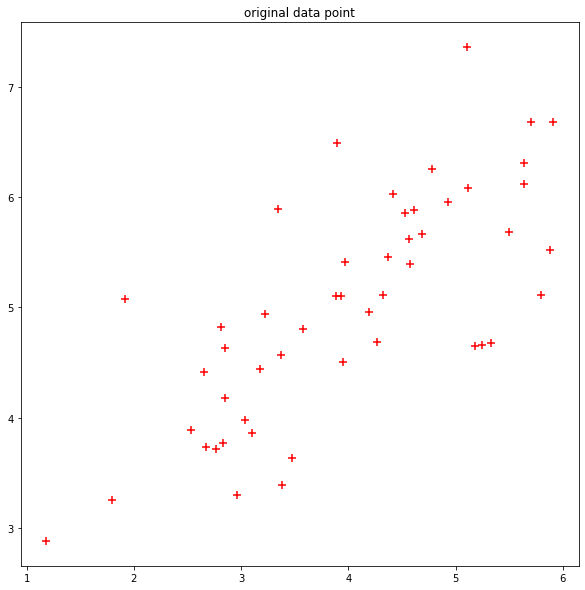

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = np.loadtxt("data-pca.txt", delimiter=',')

x = dataset[:,0]
y = dataset[:,1]

# plot data
plt.figure(1,figsize=(10,10))
plt.scatter(x, y, s=50, c='red', marker='+') 
plt.title('original data point')
plt.show()

In [2]:
def normalize_data(x, y):

    xn = ((x-np.mean(x)) / np.std(x)).reshape(-1,1) # normalize x. the mean of xn is zero and the standard deviation of xn is one #
    yn = ((y-np.mean(y)) / np.std(y)).reshape(-1,1) # normalize y. the mean of yn is zero and the standard deviation of yn is one #

    return xn, yn
 

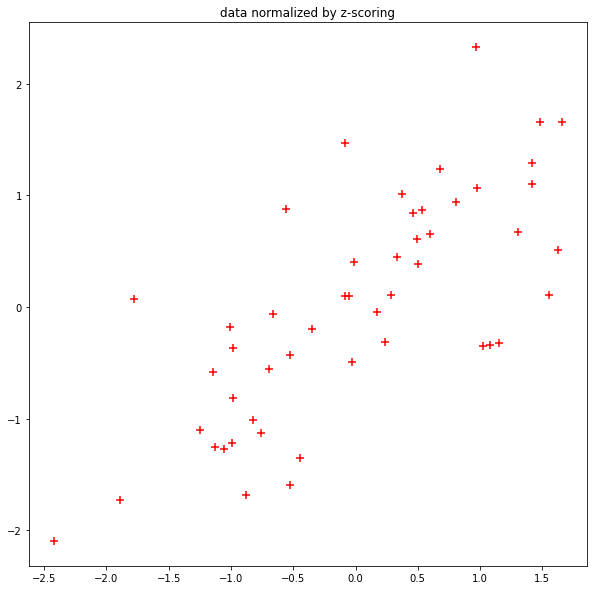

In [3]:
xn, yn = normalize_data(x, y)

# plot data
plt.figure(2,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.title('data normalized by z-scoring')
plt.show()

In [4]:
def compute_covariance(x, y):

    z = np.concatenate((x,y), axis=1)
    covar = np.dot(z.T, z) / len(z)# compute the covariance matrix #
    
    return covar


In [5]:
covar = compute_covariance(xn, yn)
print(covar)

[[1.      0.73553]
 [0.73553 1.     ]]


In [6]:
 def compute_principal_direction(covariance):
    e_value, e_vector = np.linalg.eig(covariance)
    max_e_value_idx = np.argmax(e_value)
    direction = e_vector[max_e_value_idx]# compute the principal directions from the co-variance matrix #
     
    return direction, e_vector.T, e_value


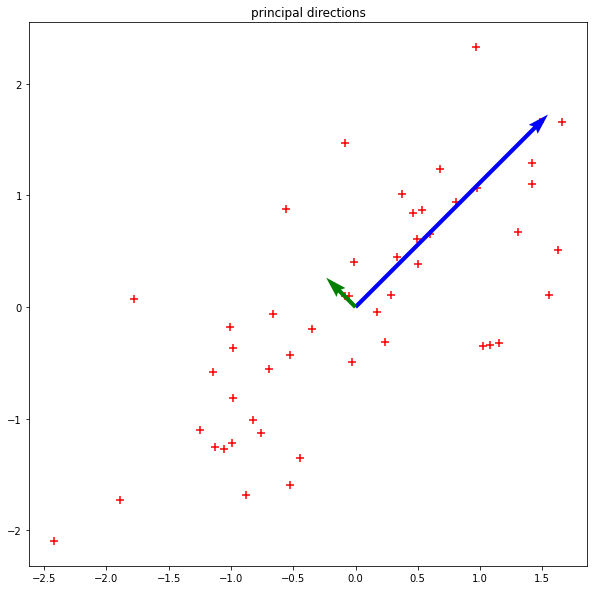

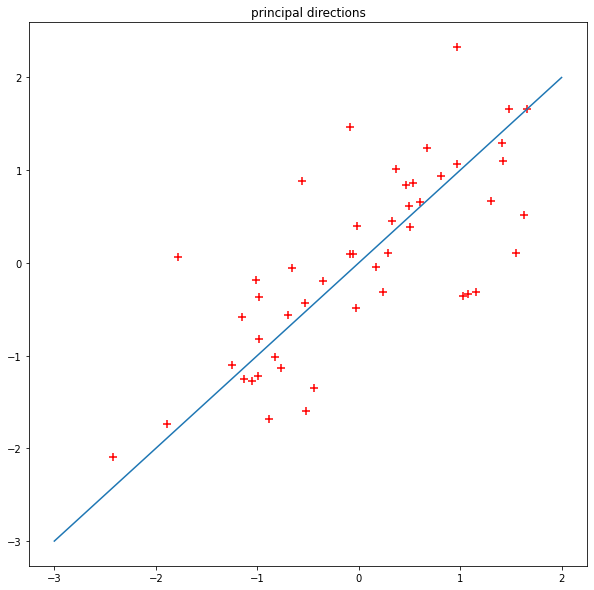

In [7]:
pc, c, e_value = compute_principal_direction(covar)

plt.figure(3,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.quiver(0,0,c[0][1], c[0][0], scale = e_value[1], scale_units = 'inches', color='b')
plt.quiver(0,0,c[1][0], c[1][1], scale = e_value[0], scale_units = 'inches', color='g')
plt.title('principal directions')
plt.show()

x = np.arange(-3,3)
y = (-pc[0] / pc[1])*x 
plt.figure(4,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.plot(x, y)
plt.title('principal directions')
plt.show()


In [43]:
reverse_delta = 0
def compute_projection(xn, yn, axis):
    global reverse_delta
    x = np.arange(-3,3)
    delta = (-axis[0]/axis[1])
    reverse_delta = -1 / delta
    y = delta*x  
    p = (yn - reverse_delta*xn) / (delta - reverse_delta)

    projection = [p, delta*p]# compute the projection of point on the axis #
    
    return projection


(50, 2)


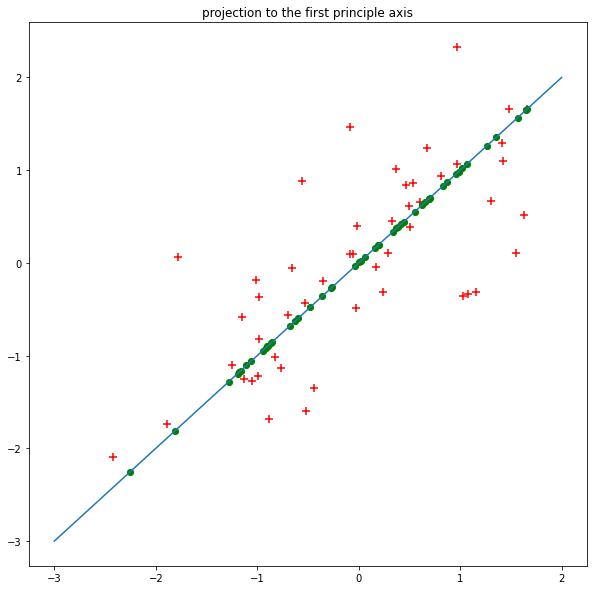

In [59]:
project_point = []
for i in range(len(xn)): #{
    project_point.append(compute_projection(xn[i], yn[i] ,pc))
#}

project_point = np.array(project_point).reshape(-1,2)
print(project_point.shape)
plt.figure(5,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.plot(x, y)
plt.scatter(project_point[:,0], project_point[:,1], s=150, c='g', marker='.') 
plt.title('projection to the first principle axis')
plt.show()

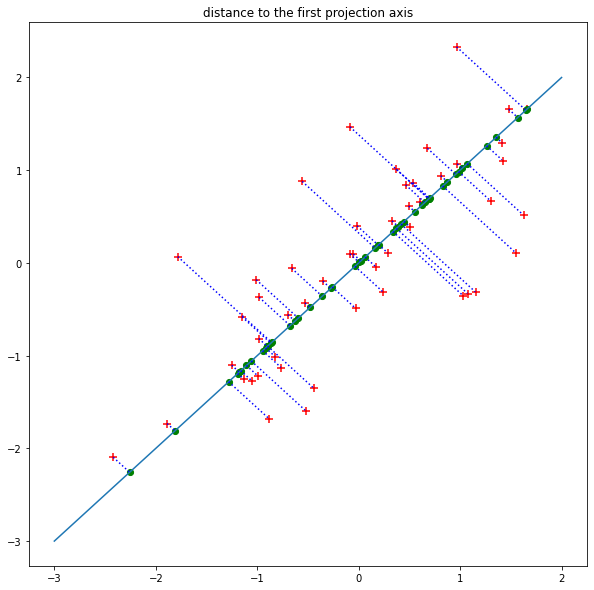

In [60]:
plt.figure(6,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.plot(x, y)
plt.scatter(project_point[:,0], project_point[:,1], s=150, c='g', marker='.') 

for i in range(len(xn)): #{
  tmp_xn = xn[i][0]
  tmp_yn = yn[i][0]

  project_x = np.arange(min(tmp_xn, project_point[i][0]), max(tmp_xn, project_point[i][0]), step=0.01)  
  project_y = reverse_delta*(project_x - tmp_xn) + tmp_yn
  plt.plot(project_x, project_y, color='b', linestyle=':')  
#}
plt.title('distance to the first projection axis')
plt.show()

In [9]:
def compute_distance(a, b):

    dist = np.sqrt(np.square(a[0] - b[0]) + np.square(a[1] - b[1]))

    return dist

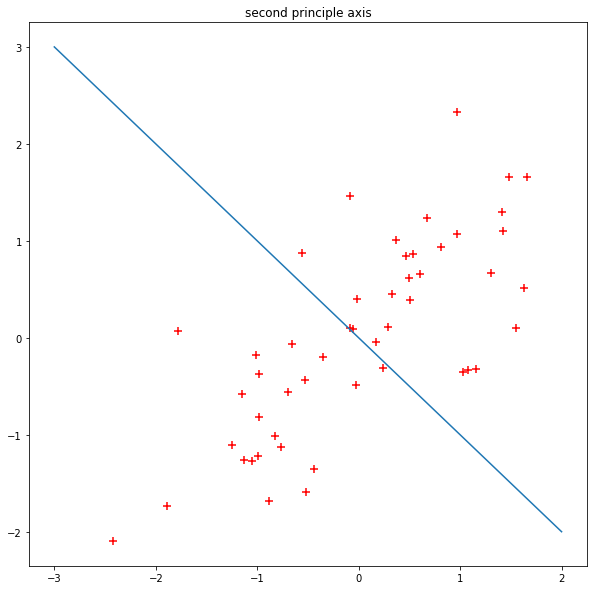

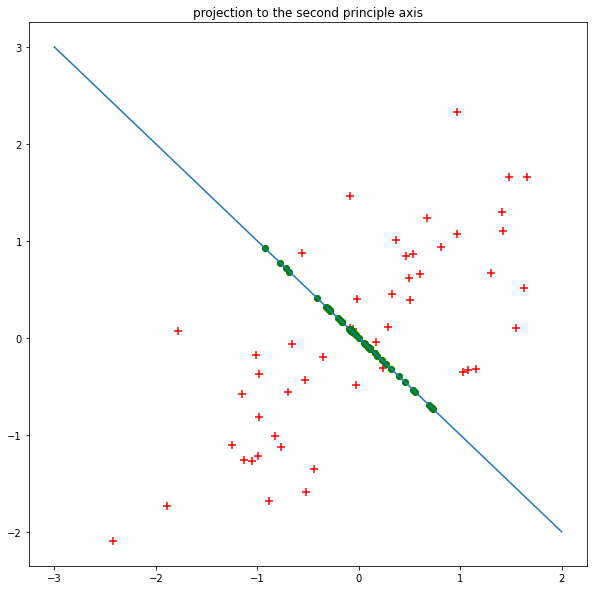

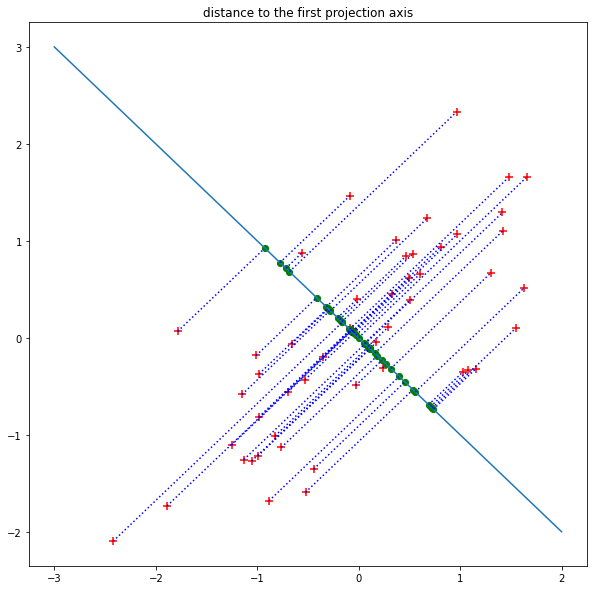

In [66]:
x2 = np.arange(-3,3)
y2 = (-c[0][1] / c[1][1])*x2 
slope = -1 / (-c[0][1] / c[1][1])

plt.figure(7,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.plot(x2, y2)
plt.title('second principle axis')
plt.show()


project_point2 = []
for i in range(len(xn)): #{
    project_point2.append(compute_projection(xn[i], yn[i] ,c[:,1]))
#}

project_point2 = np.array(project_point2).reshape(-1,2)
plt.figure(8,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.plot(x2, y2)
plt.scatter(project_point2[:,0], project_point2[:,1], s=150, c='g', marker='.') 
plt.title('projection to the second principle axis')
plt.show()

plt.figure(9,figsize=(10,10))
plt.scatter(xn, yn, s=50, c='red', marker='+') 
plt.plot(x2, y2)
plt.scatter(project_point2[:,0], project_point2[:,1], s=150, c='g', marker='.') 

for i in range(len(xn)): #{
  tmp_xn = xn[i][0]
  tmp_yn = yn[i][0]
  project_x = np.arange(min(tmp_xn, project_point2[i][0]), max(tmp_xn, project_point2[i][0]), step=0.01)  
  project_y = slope*(project_x - tmp_xn) + tmp_yn
  plt.plot(project_x, project_y, color='b', linestyle=':')  
#}
plt.title('distance to the first projection axis')
plt.show()

## Output using the dataset

1. Plot the original data points [1pt]

In [9]:
# plot data
plt.figure(1,figsize=(10,10))
plt.scatter(x, y, s=50, c='red', marker='+') 
plt.title('original data point')
plt.show()

2. Plot the normalized data points [1pt]

3. Plot the principal axes [2pt]

4. Plot the first principal axis [3pt]

5. Plot the project of the normalized data points onto the first principal axis [4pt]

6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]



7. Plot the second principal axis [3pt]

8. Plot the project of the normalized data points onto the second principal axis [4pt]

9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]